<a href="https://colab.research.google.com/github/ahforoughi/image-classification-using-kNN-and-CNN/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing K-nearest neighbour and CNN network on CIFAR dataset
## k-NN

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2
import os

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y):
    plt.figure(figsize = (15,2))
    plt.imshow(X)
    plt.xlabel(classes[y])

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000,)

(32, 32, 3)

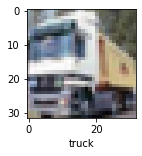

In [3]:
plot_sample(X_train[1], y_train[1])
X_train[1].shape

In [4]:
def image_to_feature_vector(image, size=(32, 32)):
	return cv2.resize(image, size).flatten()

In [5]:
number_train_sample = X_train.shape[0]
number_test_sample = X_test.shape[0]

X_train_converted = []
X_test_converted = []

for i in range(number_train_sample):
    pixels = image_to_feature_vector(X_train[i])
    X_train_converted.append(pixels)

for i in range(number_test_sample):
    pixels = image_to_feature_vector(X_test[i])
    X_test_converted.append(pixels) 



In [6]:
X_train_converted = np.array(X_train_converted)
X_test_converted = np.array(X_test_converted)
y_train_converted = np.array(y_train)
y_test_converted = np.array(y_test)

X_train_converted = X_train_converted[:20000, : ]
y_train_converted = y_train[:20000,]
X_test_converted = X_test_converted[:100, : ]
y_test_converted = y_test[:100,]

print (f"X_train shape: {X_train_converted.shape}")
print (f"y_train shape: {y_train_converted.shape}")
print (f"X_test shape: {X_test_converted.shape}")
print (f"y_test shape: {y_test_converted.shape}")

X_train shape: (20000, 3072)
y_train shape: (20000,)
X_test shape: (100, 3072)
y_test shape: (100,)


with 1 neighbour acc is 0.32
with 2 neighbour acc is 0.27
with 3 neighbour acc is 0.34
with 4 neighbour acc is 0.37
with 5 neighbour acc is 0.35
with 6 neighbour acc is 0.35
with 7 neighbour acc is 0.37
with 8 neighbour acc is 0.35
with 9 neighbour acc is 0.34
with 10 neighbour acc is 0.34
with 11 neighbour acc is 0.36
with 12 neighbour acc is 0.34
with 13 neighbour acc is 0.33
with 14 neighbour acc is 0.34
with 15 neighbour acc is 0.33
with 16 neighbour acc is 0.35
with 17 neighbour acc is 0.35
with 18 neighbour acc is 0.36
with 19 neighbour acc is 0.34
with 20 neighbour acc is 0.34
with 21 neighbour acc is 0.34
with 22 neighbour acc is 0.36
with 23 neighbour acc is 0.35
with 24 neighbour acc is 0.35
with 25 neighbour acc is 0.35
with 26 neighbour acc is 0.33
with 27 neighbour acc is 0.32
with 28 neighbour acc is 0.32
with 29 neighbour acc is 0.32
with 30 neighbour acc is 0.31
with 31 neighbour acc is 0.32
with 32 neighbour acc is 0.31
with 33 neighbour acc is 0.3
with 34 neighbour ac

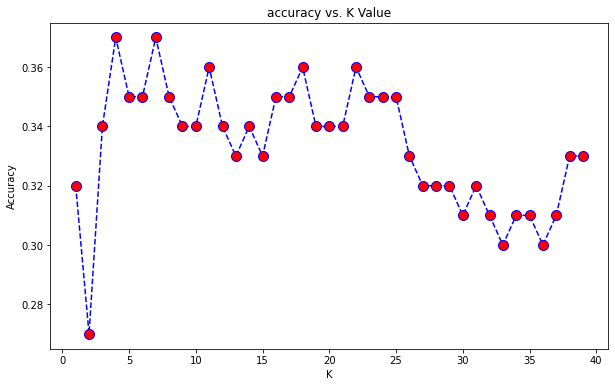

In [31]:
acc = []
from sklearn import metrics
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i).fit(X_train_converted, y_train)
    y_real = knn_model.predict(X_test_converted)
    temp = metrics.accuracy_score(y_test, y_real)
    acc.append(temp)
    print (f"with {i} neighbour acc is {temp}")
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## Convolutional Neural Network (CNN)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn_model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1563/1563 [==============================] - 36s 3ms/step - loss: 1.4900 - accuracy: 0.4622
Epoch 2/40
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1424 - accuracy: 0.5976
Epoch 3/40
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0096 - accuracy: 0.6474
Epoch 4/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9242 - accuracy: 0.6791
Epoch 5/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8624 - accuracy: 0.7003
Epoch 6/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8113 - accuracy: 0.7177
Epoch 7/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7603 - accuracy: 0.7360
Epoch 8/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7184 - accuracy: 0.7492
Epoch 9/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6781 - accuracy: 0.7625
Epoch 10/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.64

In [10]:
cnn_model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 2.3003 - accuracy: 0.6621


[2.3003146648406982, 0.6621000170707703]